In [204]:
import csv
import datetime
import io
import pandas
import plotly.graph_objects
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib notebook
from scipy import stats
# from pandas.tseries.offsets import *
from statsmodels.tsa import stattools
import numpy as np

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.express as px
import plotly.graph_objects as go

import loguru
import requests

In [344]:
# filenameTaiexs = f'taiexs-2014-2020.csv'
filenameTaiexs = f'taiexs-2019.csv'
filepathTaiexs = f'/Users/singularity/Aaron/coding/fintech/{filenameTaiexs}'

dfTaiexs = pandas.read_csv(filepathTaiexs)
dfTaiexs['Date'] = pandas.to_datetime(dfTaiexs['Date'], format='%Y%m%d')

dfTaiexs.index = dfTaiexs['Date']
dfTaiexs

,Date,OpenPrice,HighestPrice,LowestPrice,ClosePrice
Date,,,,,
2018-01-02,2018-01-02,10664.82,10710.73,10650.77,10710.73
2018-01-03,2018-01-03,10759.61,10813.16,10759.61,10801.57
2018-01-04,2018-01-04,10834.58,10853.46,10794.25,10848.63
2018-01-05,2018-01-05,10856.92,10879.80,10815.68,10879.80
2018-01-08,2018-01-08,10899.09,10918.47,10869.12,10915.75
...,...,...,...,...,...
2020-06-18,2020-06-18,11534.20,11567.42,11485.39,11548.33
2020-06-19,2020-06-19,11557.27,11584.88,11542.37,11549.86
2020-06-22,2020-06-22,11553.91,11632.88,11553.91,11572.93


In [345]:
close = dfTaiexs['ClosePrice']
taiexRet = (close-close.shift(1))/close
taiexDiff = (close-close.shift(1))
taiexLogDiff = np.log(close/close.shift(1)).dropna()
taiexRet.head()

Date
2018-01-02         NaN
2018-01-03    0.008410
2018-01-04    0.004338
2018-01-05    0.002865
2018-01-08    0.003293
Name: ClosePrice, dtype: float64

In [346]:
taiexRet = taiexRet.dropna()
taiexDiff = taiexDiff.dropna()

In [347]:
acfs = stattools.acf(taiexRet)
acfs[:13]

array([ 1.        , -0.02436281,  0.15690578,  0.04986005,  0.01101681,
       -0.0056262 , -0.00827054, -0.01747184,  0.03534648, -0.05603985,
        0.00204425,  0.03617438, -0.0464063 ])

In [348]:
pacfs = stattools.pacf(taiexRet)
pacfs[:13]

array([ 1.        , -0.02440334,  0.15692673,  0.05865677, -0.01120054,
       -0.02349203, -0.01248708, -0.01417873,  0.04107488, -0.04977361,
       -0.01175906,  0.05062702, -0.03954237])

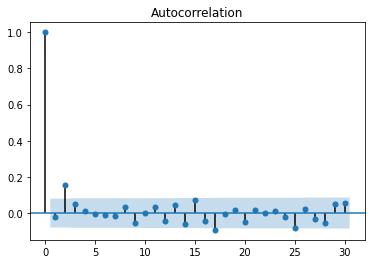

In [349]:
from statsmodels.graphics.tsaplots import *
_ = plot_acf(taiexRet, use_vlines=True, lags=30)

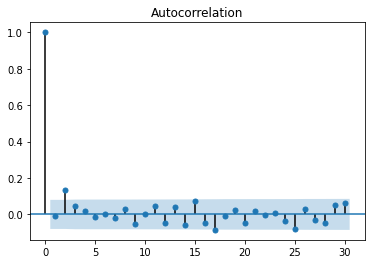

In [350]:
_ = plot_acf(taiexDiff, use_vlines=True, lags=30)

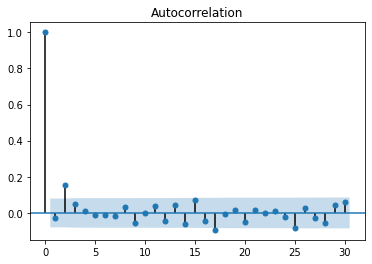

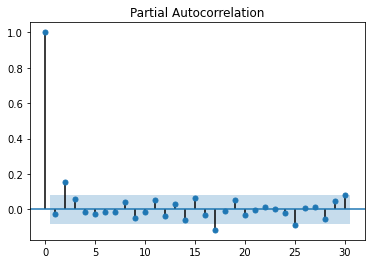

In [351]:
_ = plot_acf(taiexLogDiff, use_vlines=True, lags=30)
_ = plot_pacf(taiexLogDiff, use_vlines=True, lags=30)

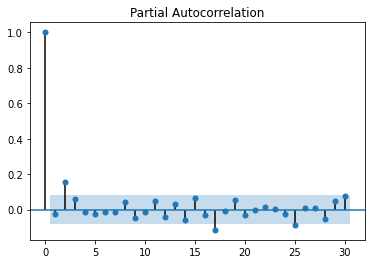

In [352]:
_ = plot_pacf(taiexRet, use_vlines=True, lags=30)

Text(0.5, 1.0, '加權股價指數收盤指數時序圖 ')

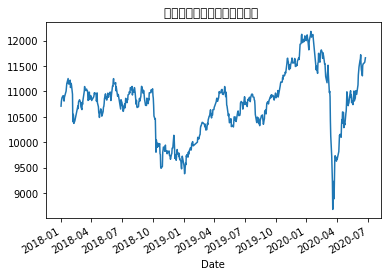

In [353]:
close.plot()
plt.title('加權股價指數收盤指數時序圖 ')

Text(0.5, 1.0, '加權股價指數收益率指數時序圖')

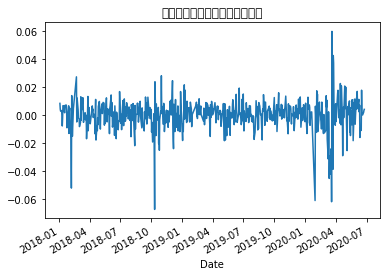

In [354]:
taiexRet.plot()
plt.title('加權股價指數收益率指數時序圖')

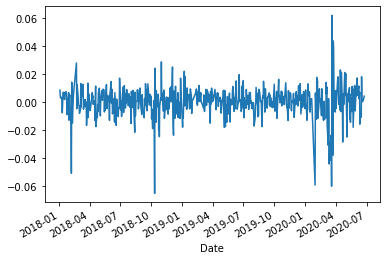

In [355]:
taiexLogDiff.plot()

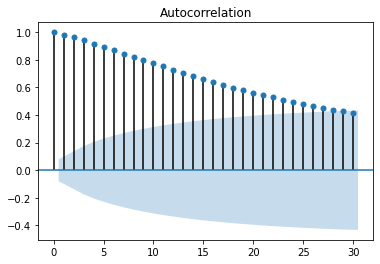

In [356]:
_ = plot_acf(close,use_vlines=True,lags=30)

Text(0.5, 1.0, '加權股價指數變動時序圖')

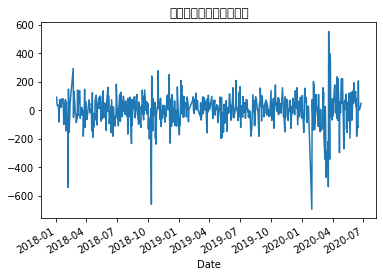

In [357]:
taiexDiff.plot()
plt.title('加權股價指數變動時序圖')

In [358]:
from arch.unitroot import ADF

print(f'adf_taiexRet\n')
adf_taiexRet=ADF(taiexRet)
print(adf_taiexRet.summary().as_text())
print(f'\n*---------------------*\n')

print(f'adf_taiexDiff\n')
adf_taiexDiff=ADF(taiexDiff)
print(adf_taiexDiff.summary().as_text())
print(f'\n*---------------------*\n')

print(f'adf_taiexLogDiff\n')
adf_taiexLogDiff=ADF(taiexLogDiff)
print(adf_taiexLogDiff.summary().as_text())
print(f'\n*---------------------*\n')

print(f'adfclose\n')
adfclose=ADF(close)
print(adfclose.summary().as_text())




adf_taiexRet

   Augmented Dickey-Fuller Results   
Test Statistic                -12.006
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
*---------------------

adf_taiexDiff

   Augmented Dickey-Fuller Results   
Test Statistic                -15.155
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
*---------------------

adf_taiexLogDiff

   Augmented Dickey-Fuller Results   
Test Statistic                -12.063
P-value                         0.000
Lags                                2
---------------

## White Noise Test

In [359]:
LjungBox1=stattools.q_stat(stattools.acf(taiexRet)[1:13],len(taiexRet))
LjungBox1[1][-1]
# 非白雜訊

0.03826039498212705

In [360]:
LjungBox1=stattools.q_stat(stattools.acf(taiexLogDiff)[1:13],len(taiexRet))
LjungBox1[1][-1]
# 非白雜訊

0.044033164284664784

In [361]:
LjungBox1=stattools.q_stat(stattools.acf(taiexDiff)[1:20],len(taiexRet))
LjungBox1[1][-1]


0.038895225595978786

In [362]:
LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(taiexRet))
LjungBox2[1][-1]

0.0

## Time Series

In [455]:
# y = taiexRet
y = taiexDiff
# y = taiexLogDiff
# y = close

In [456]:
import itertools
import warnings
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))
pdq = list(itertools.product(p, [0], q))

# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
seasonal_pdq = [(0,0,0,0)]
# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

In [457]:
import statsmodels.api as sm
# from statsmodels.tsa import arima_model
warnings.filterwarnings("ignore") # specify to ignore warning messages
aicMin = 99999999999
aicModel = ''
modelParam = None
modelparam_seasonal = None
bestResult = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param)
            # mod = sm.tsa.statespace.SARIMAX(y,
            #                                 order=param,
            #                                 seasonal_order=param_seasonal,
            #                                 enforce_stationarity=False,
            #                                 enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic <= aicMin:
                aicMin = results.aic
                aicModel = f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}'
                modelParam = param
                modelparam_seasonal = param_seasonal
                bestResult = results
        except Exception as e:
            print(e)
            continue
print(f'Min of AIC = {aicMin}')
print(aicModel)

ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:7378.507411761599
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:7380.4564676846885
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:7371.146783307969
ARIMA(0, 0, 3)x(0, 0, 0, 0)12 - AIC:7371.676559157195
ARIMA(1, 0, 0)x(0, 0, 0, 0)12 - AIC:7380.43395210374
ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:7379.373166360021
ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:7371.514523346086
ARIMA(1, 0, 3)x(0, 0, 0, 0)12 - AIC:7373.494586752771
ARIMA(2, 0, 0)x(0, 0, 0, 0)12 - AIC:7371.114930150279
ARIMA(2, 0, 1)x(0, 0, 0, 0)12 - AIC:7371.908653859848
ARIMA(2, 0, 2)x(0, 0, 0, 0)12 - AIC:7373.480899588844
ARIMA(2, 0, 3)x(0, 0, 0, 0)12 - AIC:7375.465107202845
ARIMA(3, 0, 0)x(0, 0, 0, 0)12 - AIC:7371.716561397988
ARIMA(3, 0, 1)x(0, 0, 0, 0)12 - AIC:7373.719061982797
ARIMA(3, 0, 2)x(0, 0, 0, 0)12 - AIC:7375.385849436641
ARIMA(3, 0, 3)x(0, 0, 0, 0)12 - AIC:7377.253845929602
Min of AIC = 7371.114930150279
ARIMA(2, 0, 0)x(0, 0, 0, 0)12 - AIC:7371.114930150279


In [458]:
# ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:18267.592554877836
# mod = sm.tsa.statespace.SARIMAX(y,
#                                 # order=(0, 0, 1),
#                                 # seasonal_order=(1, 0, 1, 12),
#                                 order=modelParam,
#                                 seasonal_order=modelparam_seasonal,
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)

# results = mod.fit()

# print(results.summary().tables[1])
results  = bestResult
print(results.summary())

SARIMAX Results                                
Dep. Variable:             ClosePrice   No. Observations:                  602
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -3682.557
Date:                Tue, 30 Jun 2020   AIC                           7371.115
Time:                        17:16:59   BIC                           7384.316
Sample:                             0   HQIC                          7376.253
                                - 602                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0094      0.023     -0.419      0.676      -0.054       0.035
ar.L2          0.1364      0.027      5.020      0.000       0.083       0.190
sigma2      1.207e+04    314.893     38.326      0.000    1.15e+04    1.27e+04
Ljun

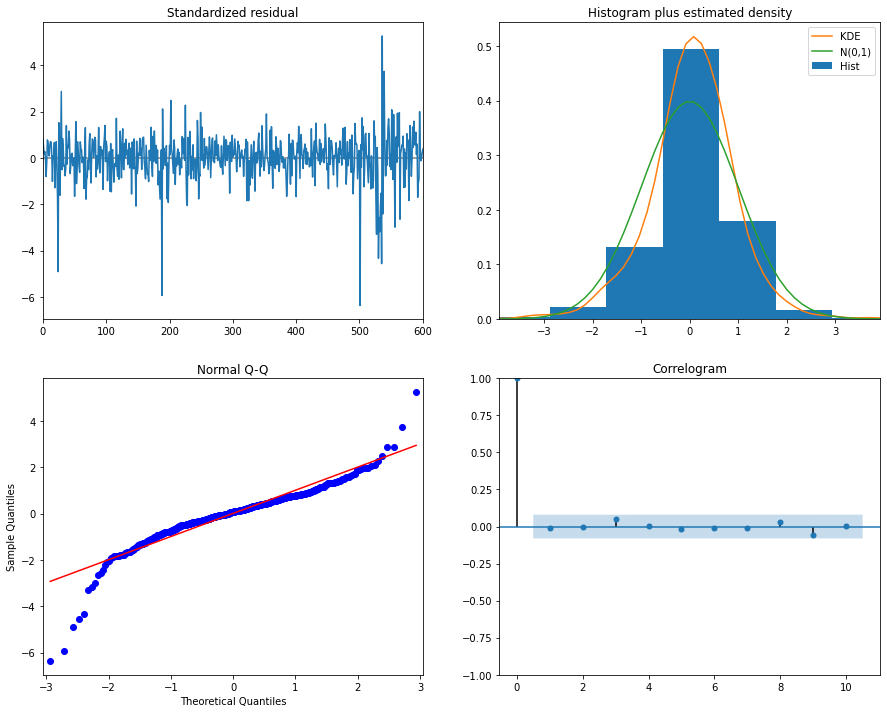

In [459]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Mstdresid: 0.012716136236549127


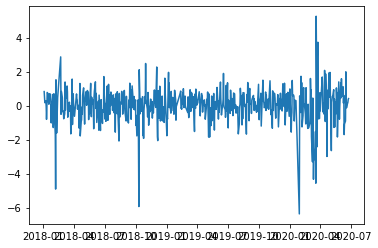

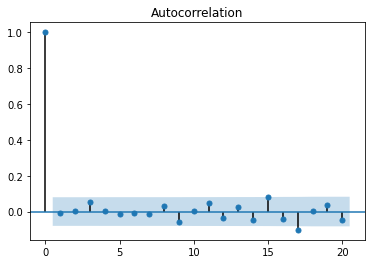

In [460]:
# results.resid
import math
stdresid = results.resid / math.sqrt(results.params.sigma2)
print(f'Mstdresid: {stdresid.mean()}')
plt.plot(stdresid)
_ = plot_acf(stdresid,lags=20)



In [461]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]

# LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
# LjungBox[1][-1]

0.857402045952434

In [462]:
pred = results.get_prediction(start=pandas.to_datetime('2020-01-02'), dynamic=False)
pred_ci = pred.conf_int(alpha=0.5)

In [463]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
            x=y['2019':].index,
            y=y['2019':],
            name = f"WinLoss",
            mode='lines+markers'
        ))
fig.add_trace(go.Scatter(
        # x=pred_ci.index,
        x=pred_ci.index,
        y=pred.predicted_mean,
        mode='lines+markers',
        name="Predict",
        line_color='#FFA500',
        line=dict(width=2)
    ))

fig.add_trace(go.Scatter(
        x=cofInterval.index,
        y=[pred_ci.iloc[:, 0] - pred_ci.iloc[:, 1]],
        mode='lines',
        name="diff",
        # line_color='#FFA500',
        line=dict(width=2)
    ))
cofInterval = pandas.concat([pred_ci.iloc[:, 0], pred_ci.iloc[::-1, 1]])

fig.add_trace(go.Scatter(
        # x=pred_ci.index,
        x=cofInterval.index,
        y=cofInterval,
        fill='toself',
        hoveron='points',
        name="Predict",
        line_color='RGBA(105,105,105,1)',
        fillcolor = 'RGBA(128, 128, 128,0.56)',
        line=dict(width=0.3)
    ))
fig.update_layout(
    title=f"Profit Graph Taiexs@",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    width=900,
    height=500,
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=50,
        pad=2
    ),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
    xaxis=plotly.graph_objects.layout.XAxis(
        tickformat='%Y-%m-%d'
    ),
    yaxis=plotly.graph_objects.layout.YAxis(
        tickformat='.2f'
    )
)
fig.show()

In [464]:
pred_ci.iloc[:, 0] - pred_ci.iloc[:, 1]

Date
2020-01-02   -148.195255
2020-01-03   -148.195255
2020-01-06   -148.195255
2020-01-07   -148.195255
2020-01-08   -148.195255
                 ...    
2020-06-18   -148.195255
2020-06-19   -148.195255
2020-06-22   -148.195255
2020-06-23   -148.195255
2020-06-24   -148.195255
Length: 114, dtype: float64

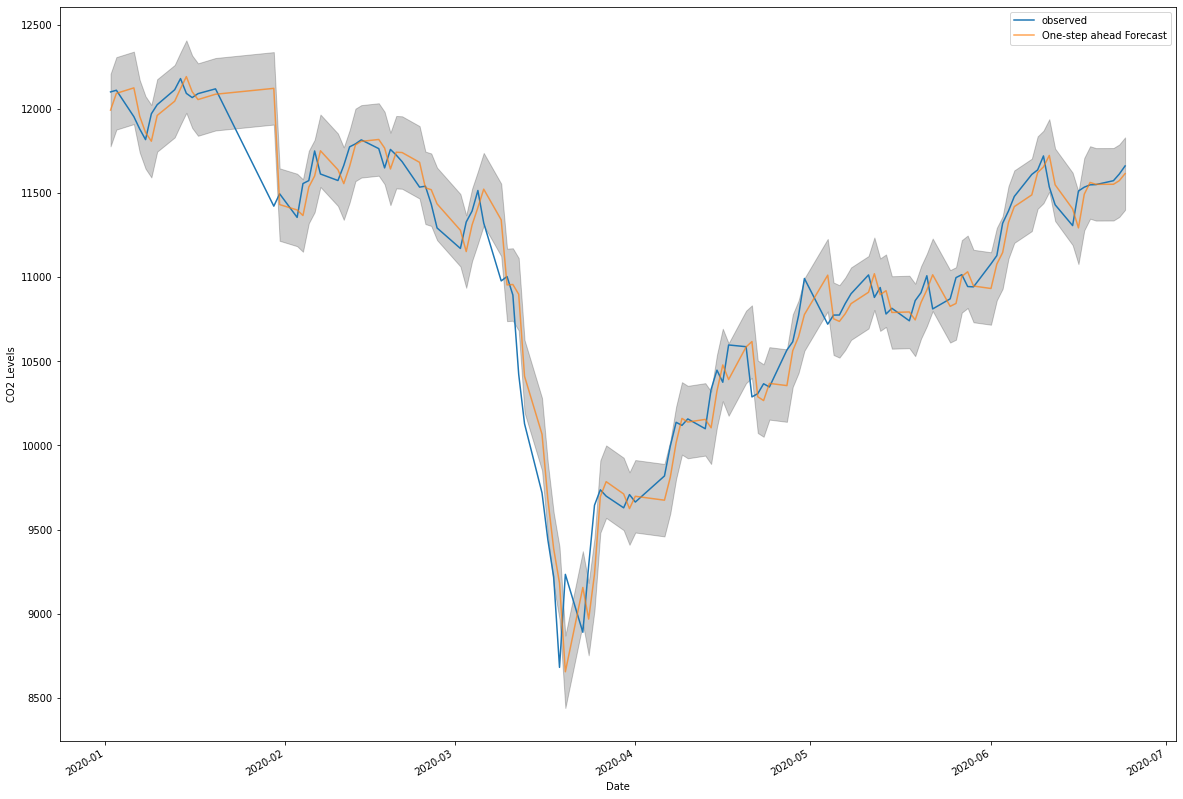

In [426]:
ax = y['2020':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [427]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-06-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10819.39


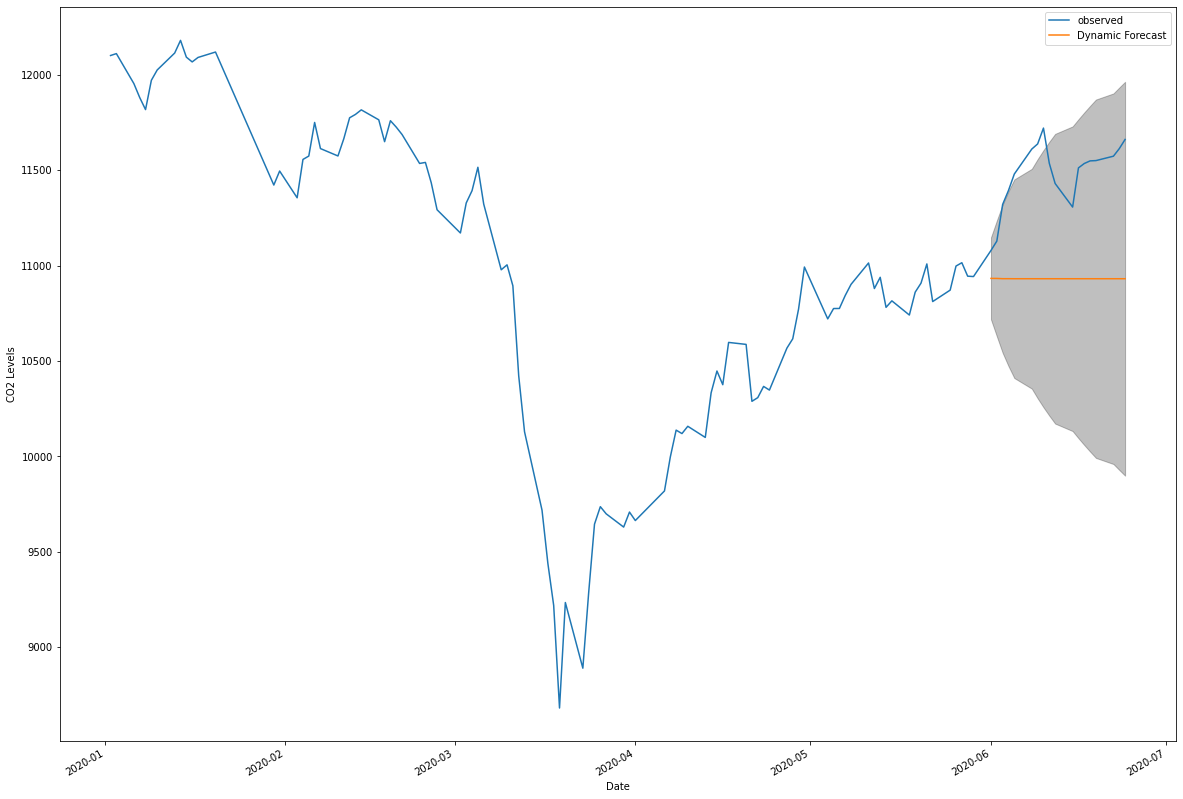

In [428]:
pred_dynamic = results.get_prediction(start=pandas.to_datetime('2020-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2020':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

# ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
#                  alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()



In [432]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2020-06-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 330107.63


In [433]:
# Get forecast 500 steps ahead in future
steps = 300
pred_uc = results.get_forecast(steps=steps)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int(alpha=0.25)
forecastDate = [y.index[-1] + datetime.timedelta(days = 1*(i+1)) for i in range(steps)]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
            x=y['2019':].index,
            y=y['2019':],
            name = f"WinLoss",
            mode='lines'
        ))
fig.add_trace(go.Scatter(
        # x=pred_ci.index,
        x=forecastDate,
        y=pred_uc.predicted_mean,
        mode='lines',
        name="Predict",
        line_color='#FFA500',
        line=dict(width=2)
    ))
    
cofInterval = pandas.concat([pred_ci.iloc[:, 0], pred_ci.iloc[::-1, 1]])
fig.add_trace(go.Scatter(
        x=forecastDate+forecastDate[::-1],
        y=cofInterval,
        fill='toself',
        hoveron='points',
        name="Predict",
        line_color='RGBA(105,105,105,1)',
        fillcolor = 'RGBA(128, 128, 128,0.56)',
        line=dict(width=0.3)
    ))
fig.update_layout(
    title=f"Profit Graph Taiexs@",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    width=900,
    height=500,
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=50,
        pad=2
    ),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
    xaxis=plotly.graph_objects.layout.XAxis(
        tickformat='%Y-%m-%d'
    ),
    yaxis=plotly.graph_objects.layout.YAxis(
        tickformat='.2f'
    )
)
fig.show()